In [30]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np

In [31]:
X =  np.array([
    [1, 2],
    [1.5, 1.8],
    [5, 8],
    [8, 8],
    [1, 0.6],
    [9, 11]
])

In [32]:

# plt.show()
colors =  10 *['g', 'r', 'c', 'b', 'k']

In [33]:
class Mean_Shift:
    def __init__(self, raduis=None, radius_norm_step = 100):
        self.raduis = raduis
        self.radius_norm_step = radius_norm_step

    def fit(self, data):
        if self.raduis == None:
            all_data_centroid = np.average(data, axis=0)
            all_data_norm = np.linalg.norm(all_data_centroid)
            self.raduis =  all_data_norm / self.radius_norm_step

        centroids = {}
        weights = [i for i in range(self.radius_norm_step)][::-1]
        for i in range(len(data)):
            centroids[i] = data[i]

        while True:
            new_centroids =  []
            for i in centroids:
                in_bandwidth = []
                centroid = centroids[i]
                # weights = [i for i in range(self.radius_norm_step)][::-1]
                for featureset in data:
                    # if np.linalg.norm(featureset - centroid) < self.raduis:
                    #     in_bandwidth.append(featureset)

                    distance =  np.linalg.norm(featureset -  centroid)
                    if distance == 0:#for the first iteration
                        distance =  0.000000001
                    weight_index =  int(distance/self.raduis)
                    if weight_index > self.radius_norm_step - 1:
                        weight_index =  self.radius_norm_step -1
                    to_add = (weights[weight_index]**2)*[featureset]
                    in_bandwidth += to_add

                new_centroid = np.average(in_bandwidth, axis=0)
                new_centroids.append(tuple(new_centroid))
            
            uniques =  sorted(list(set(new_centroids)))

            to_pop =[]

            for i in uniques:
                for ii in uniques:
                    if i == ii:
                        pass
                    elif np.linalg.norm(np.array(i) - np.array(ii)) <= self.raduis:
                        to_pop.append(ii)
                        break

            for i in to_pop:
                try:
                    uniques.remove(i)
                except:
                    pass
            prev_centroids =  dict(centroids)
            centroids ={}
            for i in range(len(uniques)):
                centroids[i] =  np.array(uniques[i])
            
            optimized = True

            for i in centroids:
                if not np.array_equal(centroids[i], prev_centroids[i]):
                    optimized = False
                if not optimized:
                    break

            if optimized:
                break
        
        self.centroids =  centroids
        

    def predict(self, data):
        pass

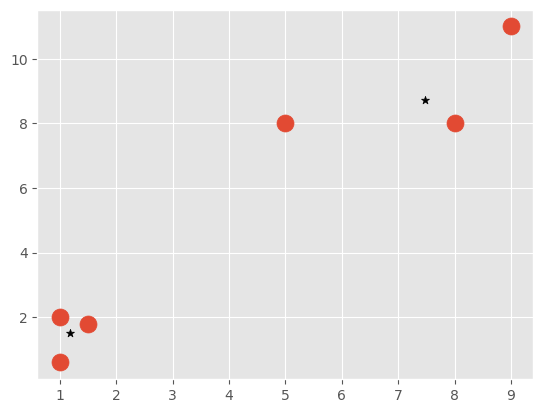

In [34]:
clf = Mean_Shift()
clf.fit(X)
centroids = clf.centroids
plt.scatter(X[:,0], X[:,1], s=150)
for c in centroids:
    plt.scatter(centroids[c][0], centroids[c][1], color = 'k', marker='*')

plt.show()